In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import statsmodels.stats.contingency_tables

## Importing and pre-processing the data

In [2]:
data = pd.read_csv("../Main Study (Face)/main_study_face_data_modified.csv")

Converting the pre/post prime indicators to words, for clarity reasons:

In [3]:
data["pre_post_prime_name"] = data["pre_post_prime"].map({0:" pre-prime",     
                                                          1:"post-prime"})

In [4]:
data.head()

,participant_id,prime_condition,prime_condition_names,trial_number,image,pre_post_prime,chose_masc,pre_post_prime_name
0,11,1,neutral,2,Slide11.bmp,0,0,pre-prime
1,11,1,neutral,3,Slide9.bmp,0,1,pre-prime
2,11,1,neutral,4,Slide5.bmp,0,0,pre-prime
3,11,1,neutral,5,Slide1.bmp,0,1,pre-prime
4,11,1,neutral,6,Slide18.bmp,0,1,pre-prime


Creating a dataset containing only the post-prime values:

In [5]:
only_post = data[data["pre_post_prime"]==1]

Creating a dataset containing only the pre-prime values:

In [6]:
only_pre = data[data["pre_post_prime"]==0]

# Masculinity preferences by priming group

It is interesting to explore how the participants' masculinity preferences vary both pre- and post-prime. These differences will be statistically tested using a chi square test of independence.

## Pre-prime masculinity preferences

Are there any differences in masculinity preferences between the priming groups, pre-prime?

In [7]:
only_pre.groupby("prime_condition_names")["chose_masc"].describe()

,count,mean,std,min,25%,50%,75%,max
prime_condition_names,,,,,,,,
male group,1198.0,0.512521,0.500052,0.0,0.0,1.0,1.0,1.0
male/female,1283.0,0.547155,0.497966,0.0,0.0,1.0,1.0,1.0
male/male,1251.0,0.480416,0.499816,0.0,0.0,0.0,1.0,1.0
neutral,1281.0,0.555816,0.497069,0.0,0.0,1.0,1.0,1.0
pathogen,1204.0,0.544850,0.498191,0.0,0.0,1.0,1.0,1.0


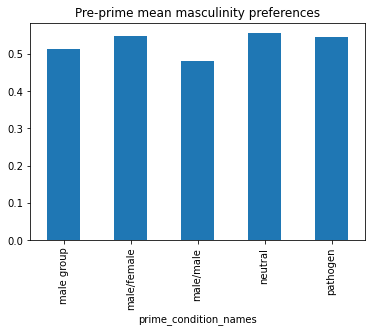

In [8]:
ax = only_pre.groupby("prime_condition_names")["chose_masc"].describe()["mean"].plot.bar()
ax.set_title("Pre-prime mean masculinity preferences");

The male/male group seems to have a naturally lower masculinity preference, with neutral being higher. But is this difference statistically significant?

Using a chi squared test of independence:

In [9]:
pre_contingency = pd.crosstab(only_pre["prime_condition_names"], only_pre["chose_masc"])
pre_contingency

chose_masc,0,1
prime_condition_names,,
male group,584,614
male/female,581,702
male/male,650,601
neutral,569,712
pathogen,548,656


In [10]:
chi2_pre, p_pre, dof_pre, expected_pre = stats.chi2_contingency(pre_contingency, correction=False)

The p value is significant - it seems like the preferences of different groups is naturally different - the participants were not completely randomised - or with such a small sample size, total randomisation was not possible.

It will therefore be important for any models to take account of these differences.

In [11]:
print(chi2_pre, p_pre)

19.753485394840656 0.000558578225753937


In [12]:
np.array(pre_contingency) - expected_pre

array([[ 19.0110986 , -19.0110986 ],
       [-24.07576001,  24.07576001],
       [ 60.01576323, -60.01576323],
       [-35.13253981,  35.13253981],
       [-19.81856201,  19.81856201]])

In [13]:
sm.stats.Table(pre_contingency).chi2_contribs

chose_masc,0,1
prime_condition_names,,
male group,0.639697,0.570957
male/female,0.957966,0.855025
male/male,6.105065,5.449026
neutral,2.043087,1.823541
pathogen,0.691727,0.617395


We can see that it was the male/male group which contributed most to the differences: this is because the participants assigned to the male/male group had a higher natural preference for femininity than expected.

## Post-prime masculinity preferences

Is there a significant difference in the masculinity preferences for each of the assigned groups, post-prime?

In [14]:
only_post.groupby("prime_condition_names")["chose_masc"].describe()

,count,mean,std,min,25%,50%,75%,max
prime_condition_names,,,,,,,,
male group,1247.0,0.595830,0.490928,0.0,0.0,1.0,1.0,1.0
male/female,1321.0,0.546556,0.498016,0.0,0.0,1.0,1.0,1.0
male/male,1301.0,0.550346,0.497650,0.0,0.0,1.0,1.0,1.0
neutral,1332.0,0.621622,0.485165,0.0,0.0,1.0,1.0,1.0
pathogen,1246.0,0.589085,0.492197,0.0,0.0,1.0,1.0,1.0


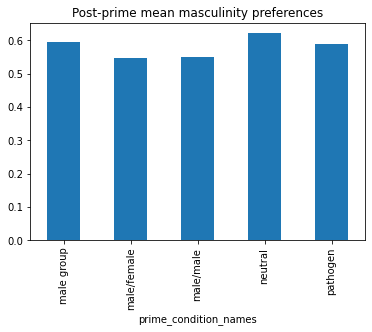

In [15]:
ax = only_post.groupby("prime_condition_names")["chose_masc"].describe()["mean"].plot.bar()
ax.set_title("Post-prime mean masculinity preferences");

The male/female condition has a lower masculinity preference than the other groups, however so does male/male. Therefore the results can only be analysed in context of the pre-prime masculinity preferences.

In [16]:
# Doing a chi squared test of independence
post_contingency = pd.crosstab(only_post["prime_condition_names"], only_post["chose_masc"])
post_contingency

chose_masc,0,1
prime_condition_names,,
male group,504,743
male/female,599,722
male/male,585,716
neutral,504,828
pathogen,512,734


In [17]:
chi2_post, p_post, dof_post, expected_post = stats.chi2_contingency(post_contingency, correction=False)

In [18]:
print(chi2_post, p_post)

21.938962822826873 0.000206105740636871


In [19]:
np.array(post_contingency) - expected_post

array([[-19.01659687,  19.01659687],
       [ 44.94633163, -44.94633163],
       [ 39.33472933, -39.33472933],
       [-54.66728711,  54.66728711],
       [-10.59717698,  10.59717698]])

In [20]:
sm.stats.Table(post_contingency).chi2_contribs

chose_masc,0,1
prime_condition_names,,
male group,0.691433,0.499502
male/female,3.646168,2.634047
male/male,2.835476,2.048391
neutral,5.349360,3.864459
pathogen,0.214889,0.155239


Looking only at the post prime data, the neutral group has a higher preference for masculinity than expected, and the male/female and male/male groups have a higher preference for femininity than expected.

## Pre- and post-prime masculinity preferences

Is there any difference in the means between combined pre/post prime and condition groups?

In [21]:
data.groupby(["prime_condition_names", "pre_post_prime_name"])["chose_masc"].describe()

count      mean       std  min  \
prime_condition_names pre_post_prime_name                                    
male group             pre-prime           1198.0  0.512521  0.500052  0.0   
                      post-prime           1247.0  0.595830  0.490928  0.0   
male/female            pre-prime           1283.0  0.547155  0.497966  0.0   
                      post-prime           1321.0  0.546556  0.498016  0.0   
male/male              pre-prime           1251.0  0.480416  0.499816  0.0   
                      post-prime           1301.0  0.550346  0.497650  0.0   
neutral                pre-prime           1281.0  0.555816  0.497069  0.0   
                      post-prime           1332.0  0.621622  0.485165  0.0   
pathogen               pre-prime           1204.0  0.544850  0.498191  0.0   
                      post-prime           1246.0  0.589085  0.492197  0.0   

                                           25%  50%  75%  max  
prime_condition_names pre_post_prime_name                      
male group             pre-prime           0.0  1.0  1.0  1.0  
                      post-prime           0.0  1.0  1.0  1.0  
male/female            pre-prime           0.0  1.0  1.0  1.0  
                      post-prime           0.0  1.0  1.0  1.0  
male/male              pre-prime           0.0  0.0  1.0  1.0  
                      post-prime           0.0  1.0  1.0  1.0  
neutral                pre-prime           0.0  1.0  1.0  1.0  
                      post-prime           0.0  1.0  1.0  1.0  
pathogen               pre-prime           0.0  1.0  1.0  1.0  
                      post-prime           0.0  1.0  1.0  1.0

<AxesSubplot:xlabel='prime_condition_names,pre_post_prime_name'>

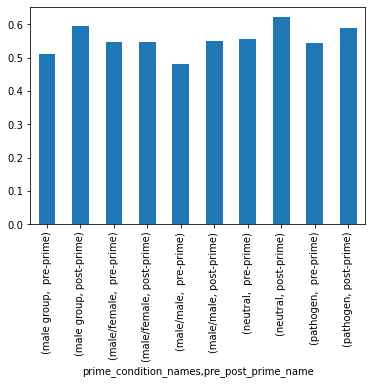

In [22]:
data.groupby(["prime_condition_names", "pre_post_prime_name"])["chose_masc"].describe()["mean"].plot.bar()

In [23]:
all_contingency = pd.crosstab([data["prime_condition_names"], data["pre_post_prime_name"]], data["chose_masc"])
all_contingency.index = list(all_contingency.index)
all_contingency

chose_masc,0,1
"(male group, pre-prime)",584,614
"(male group, post-prime)",504,743
"(male/female, pre-prime)",581,702
"(male/female, post-prime)",599,722
"(male/male, pre-prime)",650,601
"(male/male, post-prime)",585,716
"(neutral, pre-prime)",569,712
"(neutral, post-prime)",504,828
"(pathogen, pre-prime)",548,656
"(pathogen, post-prime)",512,734


In [24]:
chi2_all, p_all, dof_all, expected_all = stats.chi2_contingency(all_contingency, correction=False)

In [25]:
print(chi2_all, p_all)

76.46586931961704 8.110459511046936e-13


In [26]:
np.array(all_contingency) - expected_all

array([[ 50.84080859, -50.84080859],
       [-50.96620341,  50.96620341],
       [ 10.01231838, -10.01231838],
       [ 11.10075805, -11.10075805],
       [ 93.25363234, -93.25363234],
       [  6.00157928,  -6.00157928],
       [ -1.09759949,   1.09759949],
       [-88.79469362,  88.79469362],
       [ 12.17056222, -12.17056222],
       [-42.52116235,  42.52116235]])

In [27]:
sm.stats.Table(all_contingency).chi2_contribs

chose_masc,0,1
"(male group, pre-prime)",4.848060,3.887830
"(male group, post-prime)",4.680562,3.753507
"(male/female, pre-prime)",0.175567,0.140793
"(male/female, post-prime)",0.209605,0.168090
"(male/male, pre-prime)",15.619752,12.526027
"(male/male, post-prime)",0.062209,0.049888
"(neutral, pre-prime)",0.002113,0.001695
"(neutral, post-prime)",13.300554,10.666181
"(pathogen, pre-prime)",0.276436,0.221684
"(pathogen, post-prime)",3.260560,2.614757


As found before: in the pre-prime state, the group of participants assigned to the male/male group have a higher preference for femininity than expected.  
In post-prime, the neutral group have a higher preference for masculinity than expected.